<h1>Analysis of sentiments for various topics on social media</h1>

For the current task, we will analyse the sentiments of public, for a variety of topics, ranging from positive, negative, neutral or irrelevent.

First, we will import Pandas

In [30]:
import pandas as pd

Now we will import the data file obtained from the link:<br>
<href>https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?resource=download&select=twitter_validation.csv</href>

In [4]:
file_path = 'twitter_training.csv'
data = pd.read_csv(file_path)

Now we will check the shape an first few rows of the data, in order to have an idea about the dataset

In [5]:
data_shape = data.shape
data_head = data.head()

data_shape, data_head

((74681, 4),
    2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     )

<h2>Preprocessing the data</h2>

Naming the columns of the uncolumned data:

In [6]:
data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

Removing the duplicate data:

In [32]:
duplicates = data.duplicated().sum()
data_cleaned = data.drop_duplicates()

Removing rows with an empty sentiment columm:

In [8]:
missing_values = data_cleaned.isnull().sum()
data_cleaned = data_cleaned.dropna(subset=['Text'])

Counting number of each sentiment in the data set

In [11]:
sentiment_distribution_cleaned = data_cleaned['Sentiment'].value_counts()

<h2>Plotting the graph:</h2>

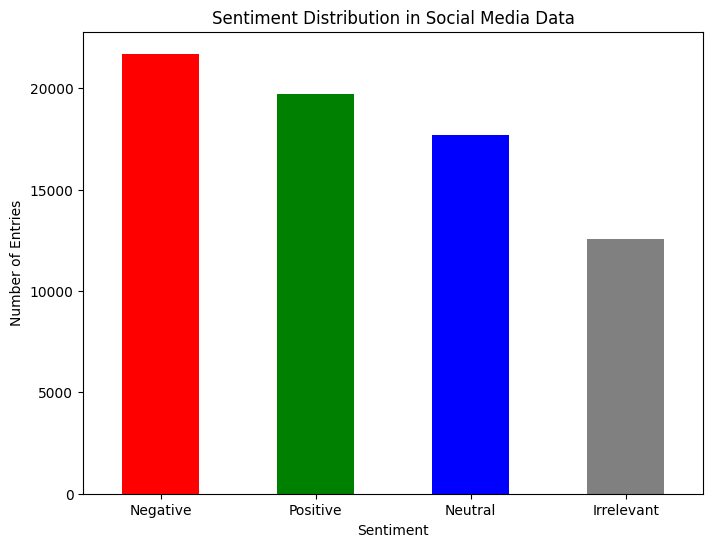

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_distribution_cleaned.plot(kind='bar', color=['red', 'green', 'blue', 'grey'])
plt.title('Sentiment Distribution in Social Media Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.show()

<h2>Sentimental analysis by topis</h2>

We will now group the sentiments by the topic they are about

In [13]:
sentiment_by_topic = data_cleaned.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)

Now we will arrange them in descending order, and picking up the top ten entries

In [14]:
top_topics = sentiment_by_topic.sum(axis=1).sort_values(ascending=False).head(10).index
sentiment_top_topics = sentiment_by_topic.loc[top_topics]

Now plotting it in a graph

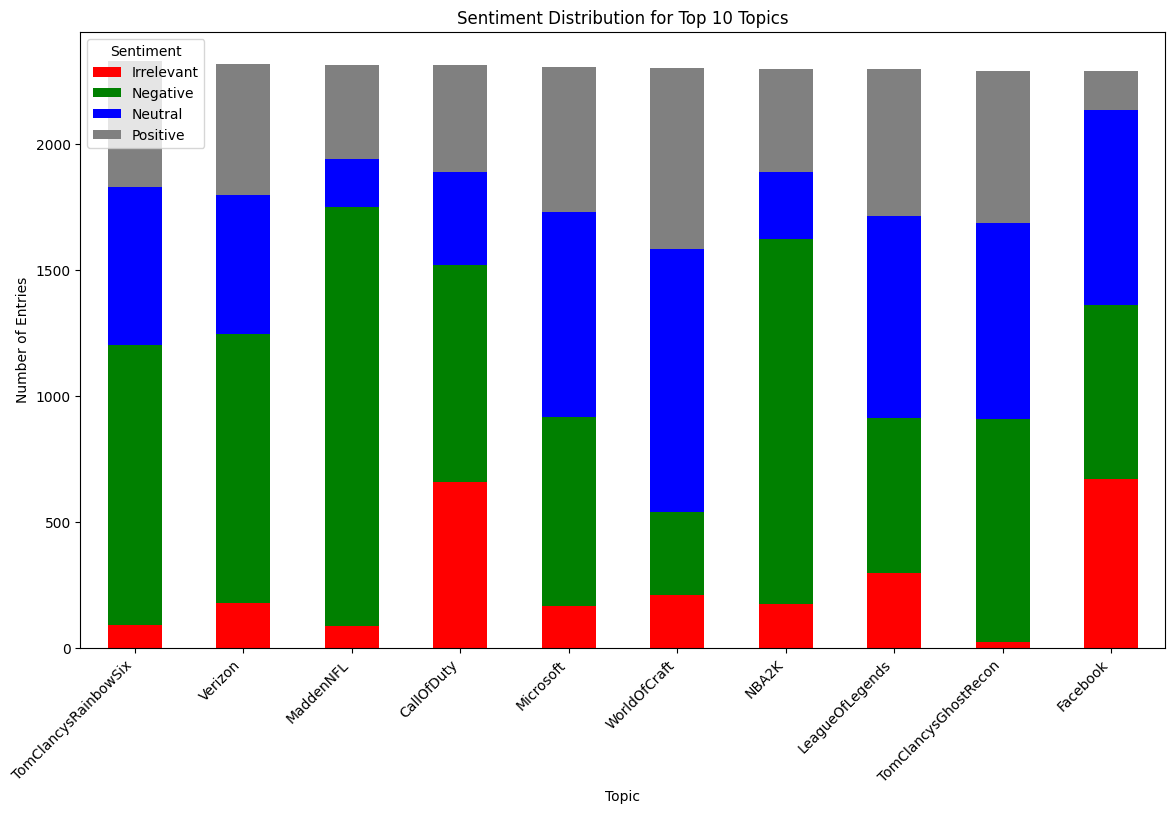

In [35]:
sentiment_top_topics.plot(kind='bar', stacked=True, figsize=(14, 8), color=['red', 'green', 'blue', 'grey'])
plt.title('Sentiment Distribution for Top 10 Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

Now we plot a graph for "Borderlands" topic.

In [16]:
topic_data = data_cleaned[data_cleaned['Topic'] == 'Borderlands']

topic_sentiment_distribution = topic_data['Sentiment'].value_counts()

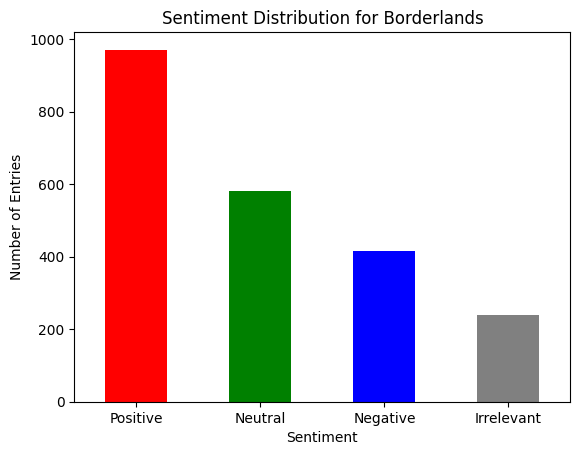

In [17]:
topic_sentiment_distribution.plot(kind='bar', color=['red', 'green', 'blue', 'grey'])
plt.title('Sentiment Distribution for Borderlands')
plt.xlabel('Sentiment')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.show()

<h2>Correlation table of topics with sentiments</h2>

Using Seaborn, we create a correlation table between various topics, and their correlation with sentiments.


In [19]:
pivot_table = data_cleaned.pivot_table(index='Topic', columns='Sentiment', aggfunc='size', fill_value=0)
normalized_pivot = pivot_table.div(pivot_table.sum(axis=1), axis=0)

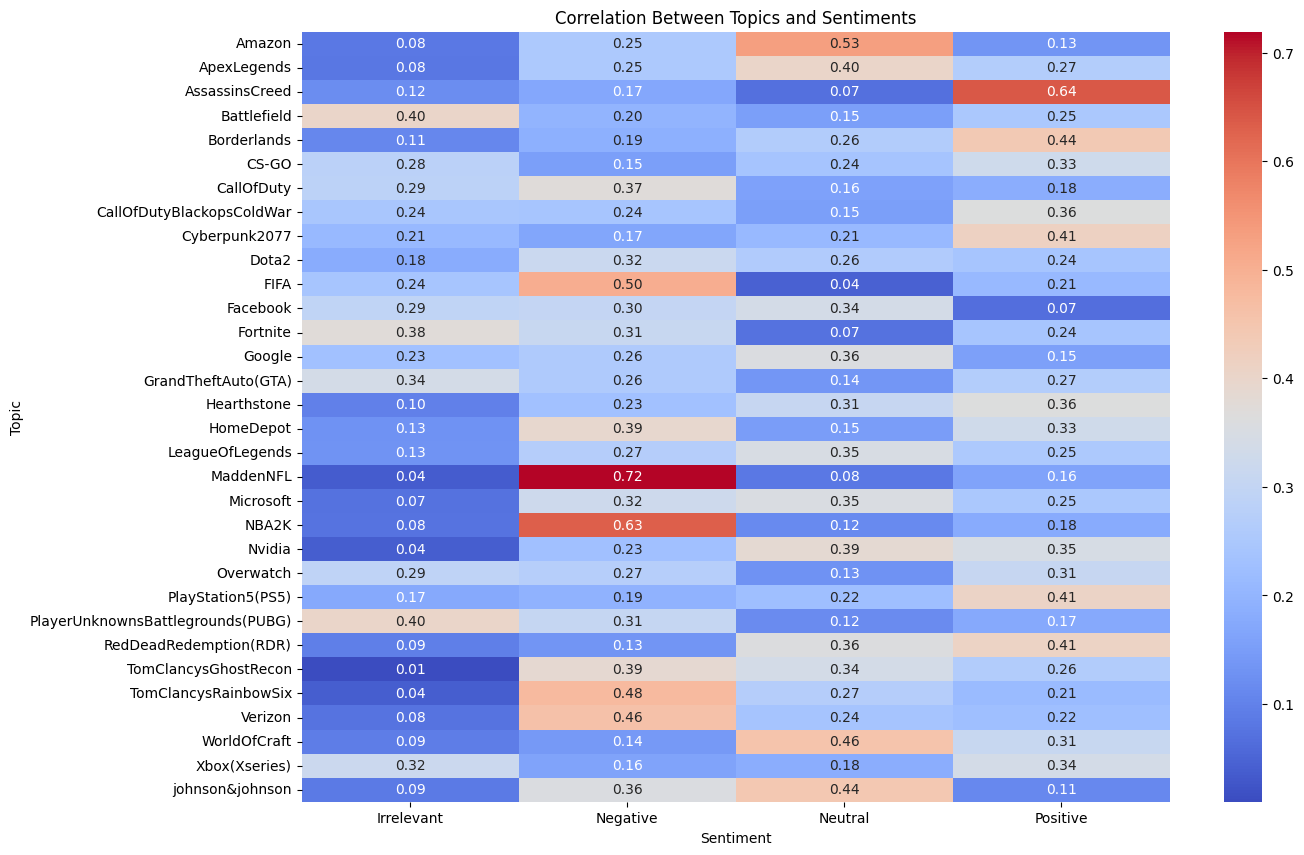

In [21]:
import seaborn as sns
plt.figure(figsize=(14, 10))
sns.heatmap(normalized_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Between Topics and Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

<h2>Most used words in each sentiment</h2>

Finally, we will analyse the data to look for the most used words in each sentiment.

For that purpose, we import Wordcloud library

In [23]:
from wordcloud import WordCloud, STOPWORDS

We will define a function to remove the stop words from the text, like <b>'THE'</b> and <b>'AND'</b>

In [ ]:
def preprocess_text(text):
    stopwords = set(STOPWORDS)
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])

Now wwe will produce a wordcloud for the most used word in each sentiment.

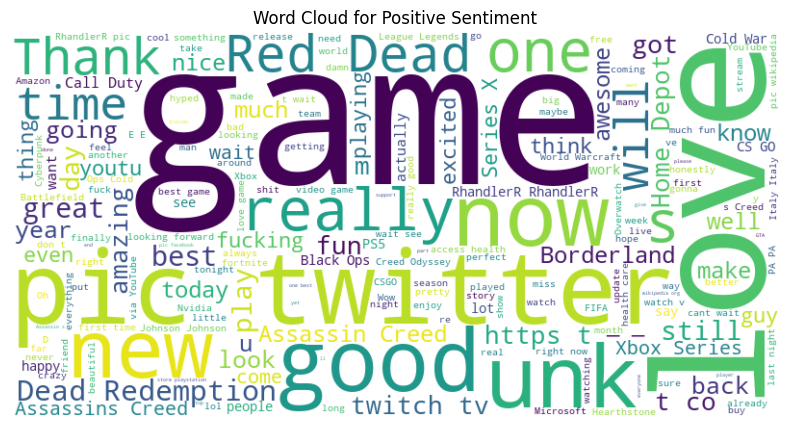

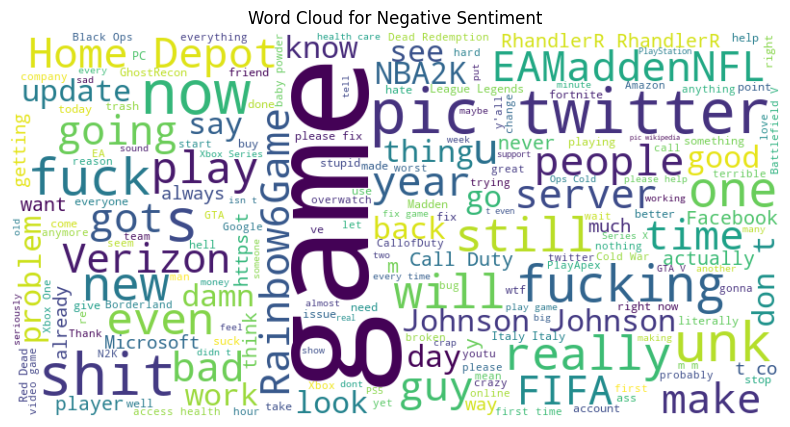

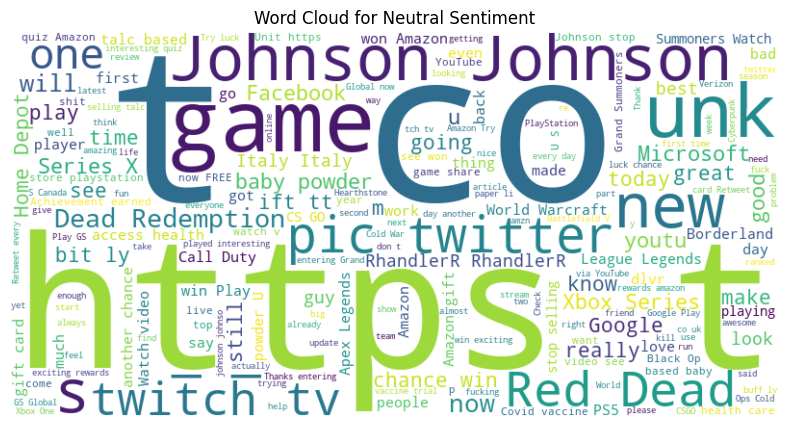

In [29]:
sentiments = ['Positive', 'Negative', 'Neutral']

for sentiment in sentiments:
    sentiment_data = data_cleaned[data_cleaned['Sentiment'] == sentiment]['Text'].apply(preprocess_text)
    combined_text = ' '.join(sentiment_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()